In [1]:
__author__ = "Zhenming Xu"
__email__ = "15216105346@163.com"
__date__ = "Aug 9, 2019"

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from collections import Counter
import sys
from pymatgen.ext.matproj import MPRester
from pymatgen.core.structure import Structure
from pymatgen.analysis.structure_matcher import StructureMatcher

In [3]:
def element_list(e):
    element = []
    for i, j in enumerate(list(set(e.species))):
        element.append(str(j))
    return element

In [4]:
def element_index(str, element):
    a = []
    for i,s in enumerate(str.sites):
        if s.specie.name == '{}'.format(element):
            a.append(i)
    return a

In [5]:
def str_with_non_anion_atoms(S):
    origin_elements = element_list(S)
    for i in ['O','S','Se','Te','F','Cl','Br','I']:
        if i in origin_elements:
            origin_elements.remove(i)           
    S.remove_species(origin_elements)
    return S

In [6]:
def matching_anion_framework(B):
    s1 = str_with_non_anion_atoms(B)
    fcc = Structure.from_file('fcc.cif')
    bcc = Structure.from_file('bcc.cif')
    hcp = Structure.from_file('hcp.cif')
    m = StructureMatcher(ltol=0.1, stol=0.2, angle_tol=3, attempt_supercell=True, ignored_species=None)

    b = {}
    c = {'fcc': fcc, 'bcc': bcc, 'hcp': hcp}
    for i in ['fcc', 'bcc', 'hcp']:
        b[i] = m.fit_anonymous(s1, c[i])
    d = {}
    if True in b.values():
        for j in b.keys():
            if str(b[j]) == 'True':
                rms = m.get_rms_anonymous(s1, c[j])
                d['anion_type'] = j
                d['rms'] = round(rms[0],3)
    else:
        d['anion_type'] = 'none'
        d['rms'] = 'none'
    return d

In [7]:
input_file = sys.argv[0]
data = pd.read_csv('stable_lithium_sulfides_from_MP_database.csv')
total_stable_mp_ids = np.array(data.material_id).tolist()

In [8]:
mp_api = MPRester()
d = []
for material_id in total_stable_mp_ids:
    f = {}
    crystal_structure = mp_api.get_structure_by_material_id('{}'.format(material_id), final=True, conventional_unit_cell=True)
    g = matching_anion_framework(crystal_structure)
    f['mp_id'] = material_id   
    properties = mp_api.query(material_id, properties = ['pretty_formula', 'spacegroup.symbol', 'e_above_hull'])
    f.update(properties[0])
    f.update(g)
    d.append(f)
DataFrame(d).to_csv('matching_anion_framework_for_sulfides.csv')
DataFrame(d)

/usr/local/lib/python3.7/site-packages/pymatgen/io/cif.py:1101: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


,anion_type,e_above_hull,mp_id,pretty_formula,rms,spacegroup.symbol
0,fcc,0.000000,mp-1211167,LiCr4GaS8,0,F-43m
1,none,0.000000,mp-558219,SrLi(BS2)3,none,Cc
2,none,0.000000,mp-559238,CsLi2BS3,none,Pnma
3,none,0.000000,mp-557892,BaLi(BS2)3,none,Cc
4,none,0.000000,mp-554076,BaLiBS3,none,P2_1/c
5,fcc,0.000000,mp-1045401,Li(MnS2)2,0.068,Fd-3m
6,none,0.000000,mp-675779,Li2Mo3S4,none,P1
7,fcc,0.000000,mp-15791,LiErS2,0,R-3m
8,fcc,0.000000,mp-15790,LiHoS2,0,R-3m
9,fcc,0.000000,mp-760375,Li3VS4,0.111,P-43m


A total of 233 compounds,  Counter({'none': 96, 'fcc': 58, 'hcp': 52, 'bcc': 27})
{'fcc': 0.249, 'hcp': 0.223, 'bcc': 0.116, 'others': 0.412}


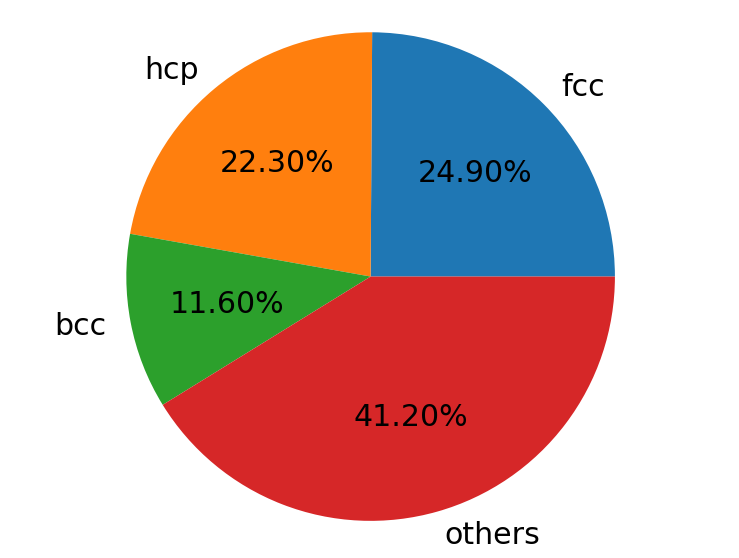

In [9]:
input_file = sys.argv[0]
data = pd.read_csv('matching_anion_framework_for_sulfides.csv')
#data = DataFrame(d)
anion_types = np.array(data.anion_type).tolist()

a = {}
for i in Counter(anion_types).keys():
    a['{}'.format(i)] = round((Counter(anion_types)['{}'.format(i)])/(len(anion_types)),3)
a['others'] = a.pop('none')
Counter(anion_types)['others'] = Counter(anion_types).pop('none')
print('A total of ''{}'' compounds, '.format(len(anion_types)), Counter(anion_types))
print(a)
figure1, ax = plt.subplots(figsize=(13, 10))
patches, texts, autotexts = ax.pie(a.values(), labels=a.keys(), autopct='%1.2f%%')
proptease = fm.FontProperties()
proptease.set_size('30')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('Matched anion frameworks of sulfides from MP database', fontdict = {'fontsize' : 30})
plt.savefig('Matched anion frameworks of sulfides from MP database.png',dpi=300)
plt.show()
plt.close()